In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!mkdir ~/.kaggle && cp kaggle.json ~/.kaggle/ && kaggle datasets download -d gpiosenka/100-bird-species && unzip 100-bird-species.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/VERMILION FLYCATHER/102.jpg  
  inflating: train/VERMILION FLYCATHER/103.jpg  
  inflating: train/VERMILION FLYCATHER/104.jpg  
  inflating: train/VERMILION FLYCATHER/105.jpg  
  inflating: train/VERMILION FLYCATHER/106.jpg  
  inflating: train/VERMILION FLYCATHER/107.jpg  
  inflating: train/VERMILION FLYCATHER/108.jpg  
  inflating: train/VERMILION FLYCATHER/109.jpg  
  inflating: train/VERMILION FLYCATHER/110.jpg  
  inflating: train/VERMILION FLYCATHER/111.jpg  
  inflating: train/VERMILION FLYCATHER/112.jpg  
  inflating: train/VERMILION FLYCATHER/113.jpg  
  inflating: train/VERMILION FLYCATHER/114.jpg  
  inflating: train/VERMILION FLYCATHER/115.jpg  
  inflating: train/VERMILION FLYCATHER/116.jpg  
  inflating: train/VERMILION FLYCATHER/117.jpg  
  inflating: train/VERMILION FLYCATHER/118.jpg  
  inflating: train/VERMILION FLYCATHER/119.jpg  
  inflating: train/VERMILION FLYCATHER/120.jpg  
  inflating: train

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt
import os

In [ ]:
train_path = '/content/train'
valid_path = '/content/valid'
test_path = '/content/test'

target_size = (224, 224)
batch_size = 16

directory = '/content/train'
classes = []
for filename in os.listdir(directory):
    classes.append(filename)

classes.sort()

In [ ]:
print(classes)

['ABBOTTS BABBLER', 'ABBOTTS BOOBY', 'ABYSSINIAN GROUND HORNBILL', 'AFRICAN CROWNED CRANE', 'AFRICAN EMERALD CUCKOO', 'AFRICAN FIREFINCH', 'AFRICAN OYSTER CATCHER', 'ALBATROSS', 'ALBERTS TOWHEE', 'ALEXANDRINE PARAKEET', 'ALPINE CHOUGH', 'ALTAMIRA YELLOWTHROAT', 'AMERICAN AVOCET', 'AMERICAN BITTERN', 'AMERICAN COOT', 'AMERICAN GOLDFINCH', 'AMERICAN KESTREL', 'AMERICAN PIPIT', 'AMERICAN REDSTART', 'AMETHYST WOODSTAR', 'ANDEAN GOOSE', 'ANDEAN LAPWING', 'ANDEAN SISKIN', 'ANHINGA', 'ANIANIAU', 'ANNAS HUMMINGBIRD', 'ANTBIRD', 'ANTILLEAN EUPHONIA', 'APAPANE', 'APOSTLEBIRD', 'ARARIPE MANAKIN', 'ASHY THRUSHBIRD', 'ASIAN CRESTED IBIS', 'AVADAVAT', 'AZURE JAY', 'AZURE TANAGER', 'AZURE TIT', 'BAIKAL TEAL', 'BALD EAGLE', 'BALD IBIS', 'BALI STARLING', 'BALTIMORE ORIOLE', 'BANANAQUIT', 'BAND TAILED GUAN', 'BANDED BROADBILL', 'BANDED PITA', 'BANDED STILT', 'BAR-TAILED GODWIT', 'BARN OWL', 'BARN SWALLOW', 'BARRED PUFFBIRD', 'BARROWS GOLDENEYE', 'BAY-BREASTED WARBLER', 'BEARDED BARBET', 'BEARDED BELLBIR

In [ ]:
train_gen = ImageDataGenerator(rescale=1./255, rotation_range=20)
valid_gen = ImageDataGenerator(rescale=1./255, rotation_range=10)
test_gen = ImageDataGenerator(rescale=1./255)

train_data = train_gen.flow_from_directory(
    train_path,
    target_size=(224,224),
    class_mode='categorical',
    shuffle=True
)

valid_data = valid_gen.flow_from_directory(
    valid_path,
    target_size=(224,224),
    class_mode='categorical',
    shuffle=True
)

test_data = test_gen.flow_from_directory(
    test_path,
    target_size=(224,224),
    class_mode='categorical',
    shuffle=True
)

Found 58388 images belonging to 400 classes.
Found 2000 images belonging to 400 classes.
Found 2000 images belonging to 400 classes.


In [ ]:
model = Sequential()

pretrained_model= tf.keras.applications.MobileNetV2(include_top=False,
                   input_shape=(224,224,3),
                   pooling='avg',classes=len(classes),
                   weights='imagenet')

for layer in pretrained_model.layers:
        layer.trainable=False
        
model.add(pretrained_model)
model.add(Flatten())
model.add(Dense(units=len(classes), activation='softmax'))
model.summary()

9420800/9406464 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 1280)             2257984   
 ional)                                                          
                                                                 
 flatten (Flatten)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 400)               512400    
                                                                 
Total params: 2,770,384
Trainable params: 512,400
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(x=train_data, validation_data=valid_data, epochs=20, callbacks=[early_stopping])

Epoch 1/20
1825/1825 [==============================] - 692s 373ms/step - loss: 1.4868 - accuracy: 0.6765 - val_loss: 0.5033 - val_accuracy: 0.8705
Epoch 2/20
1825/1825 [==============================] - 676s 370ms/step - loss: 0.5979 - accuracy: 0.8470 - val_loss: 0.3843 - val_accuracy: 0.8975
Epoch 3/20
1825/1825 [==============================] - 656s 359ms/step - loss: 0.4276 - accuracy: 0.8847 - val_loss: 0.3337 - val_accuracy: 0.9135
Epoch 4/20
1825/1825 [==============================] - 659s 361ms/step - loss: 0.3401 - accuracy: 0.9064 - val_loss: 0.3180 - val_accuracy: 0.9070
Epoch 5/20
1825/1825 [==============================] - 656s 359ms/step - loss: 0.2807 - accuracy: 0.9218 - val_loss: 0.2917 - val_accuracy: 0.9160
Epoch 6/20
1825/1825 [==============================] - 660s 362ms/step - loss: 0.2385 - accuracy: 0.9320 - val_loss: 0.3063 - val_accuracy: 0.9125
Epoch 7/20
1825/1825 [==============================] - 662s 363ms/step - loss: 0.2031 - accuracy: 0.9418 - val_

In [ ]:
model.save('bird_classifier.h5')

/content/test/BROWN NOODY/*
BROWN NOODY
0.9870991


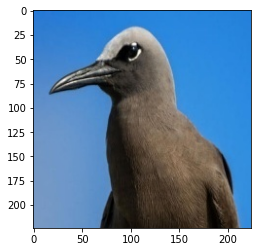

In [ ]:
import cv2
from random import choice
import glob

loaded_model = tf.keras.models.load_model('bird_classifier.h5')
path = f"/content/test/{choice(classes)}/*"
print(path)
random_dir = choice(glob.glob(path))
image = cv2.imread(random_dir)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = image.astype('float32') / 255.0
image = cv2.resize(image, (224, 224))
image = image.reshape((1, 224, 224, 3))
pred = loaded_model.predict(image)
print(classes[np.argmax(pred[0])])
print(np.max(pred[0]))
plt.imshow(image.reshape(224, 224, 3))
plt.show()

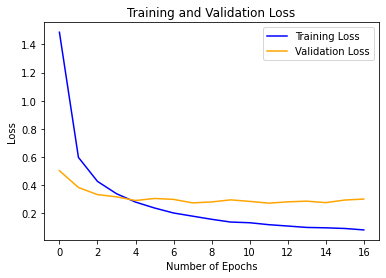

In [ ]:
plt.plot(history.history['loss'], 'blue', label = 'Training Loss')
plt.plot(history.history['val_loss'], 'orange', label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

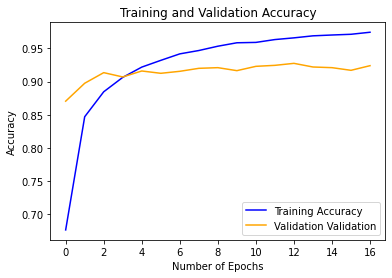

In [ ]:
plt.plot(history.history['accuracy'], 'blue', label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], 'orange', label = 'Validation Validation')
plt.title('Training and Validation Accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()